In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("data/HR_analysis.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [5]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [6]:
front=df.turnover
df.drop(['turnover'], axis=1, inplace=True)
df.columns

Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany', 'workAccident', 'promotion', 'department', 'salary'],
      dtype='object')

In [12]:
df.insert(0,'turnover',front)
df.columns

Index(['turnover', 'satisfaction', 'evaluation', 'projectCount',
       'averageMonthlyHours', 'yearsAtCompany', 'workAccident', 'promotion',
       'department', 'salary'],
      dtype='object')

In [13]:
print(df.shape)
print(df.dtypes)

(14999, 10)
turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object


In [14]:
# number of rows
df.shape[0]==len(df)

True

In [16]:
df.turnover.value_counts()

0    11428
1     3571
Name: turnover, dtype: int64

In [15]:
turnover_rate=df.turnover.value_counts()/len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [17]:
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [19]:
turnover_summary=df.groupby(['turnover']).mean()
print(type(turnover_summary))
turnover_summary

<class 'pandas.core.frame.DataFrame'>


,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [22]:
corr1=df.corr()
corr1

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


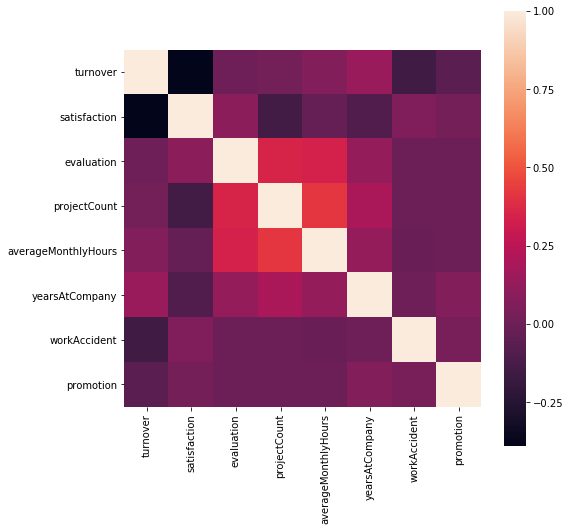

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(corr1, square=True)

In [27]:
emp_population=df.satisfaction.mean()
emp_turnover_satisfaction=df[df.turnover==1]['satisfaction'].mean()
print("overall satisfaction: %.3f" % emp_population)
print("turnover satisfaction: %.3f" %emp_turnover_satisfaction)

overall satisfaction: 0.613
turnover satisfaction: 0.440


In [28]:
# conduct t test
import scipy.stats as stats

In [29]:
stats.ttest_1samp(df[df.turnover==1]['satisfaction'], popmean=emp_population)

Ttest_1sampResult(statistic=-39.10948894348423, pvalue=9.0127811954355001e-279)

In [31]:
degree_freedom=len(df[df.turnover==1])
print("t distribution 1st and 3 quartiles are: %.3f and %.3f" %
      (stats.t.ppf(0.025, degree_freedom), stats.t.ppf(0.975, degree_freedom)))

t distribution 1st and 3 quartiles are: -1.961 and 1.961


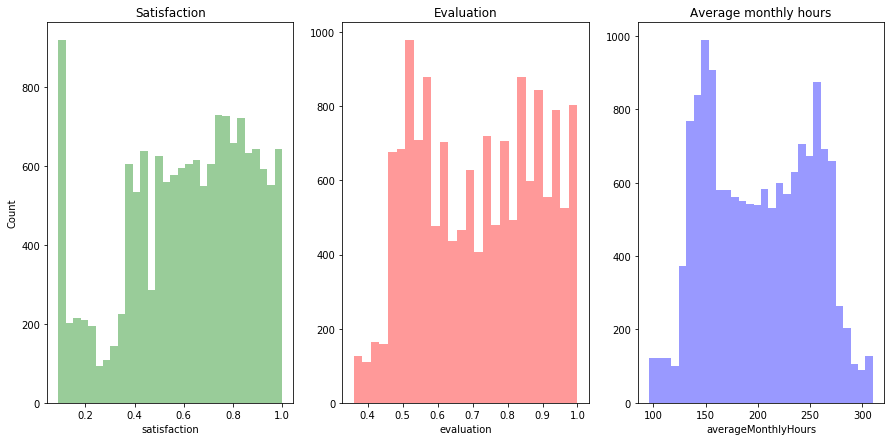

In [35]:
f, axes=plt.subplots(1,3, figsize=(15,7))
sns.distplot(df.satisfaction, kde=False, color='g',ax=axes[0]).set_title("Satisfaction")
sns.distplot(df.evaluation, kde=False, color='r',ax=axes[1]).set_title("Evaluation")
sns.distplot(df.averageMonthlyHours, kde=False, color='b', ax=axes[2]).set_title('Average monthly hours')
axes[0].set_ylabel('Count')

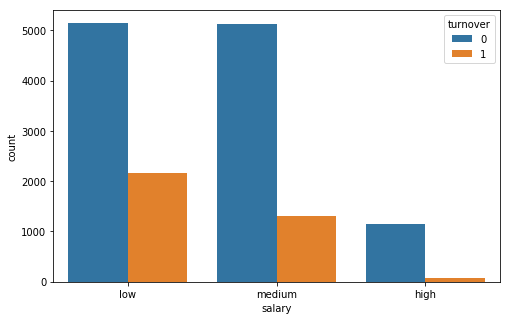

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(df.salary, hue=df.turnover)

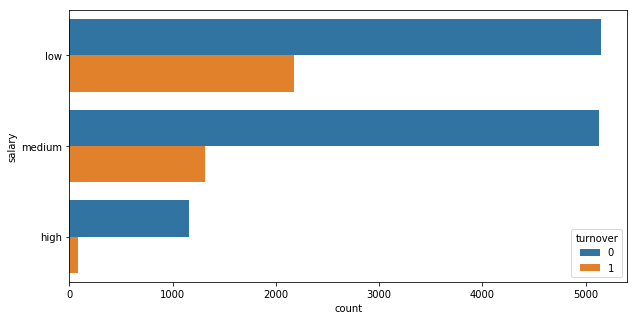

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(y='salary', hue='turnover', data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

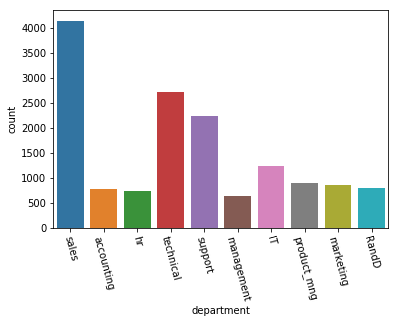

In [40]:
sns.countplot(df.department)
plt.xticks(rotation=6045)

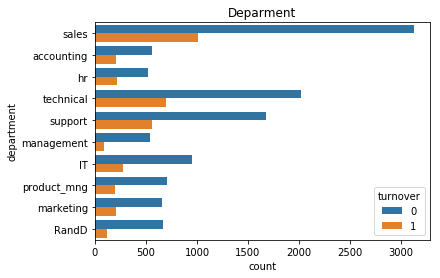

In [42]:
sns.countplot(y='department', hue='turnover',data=df).set_title("Deparment")

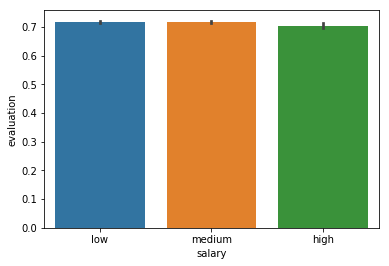

In [46]:
sns.barplot(x='salary',y='evaluation', data=df)

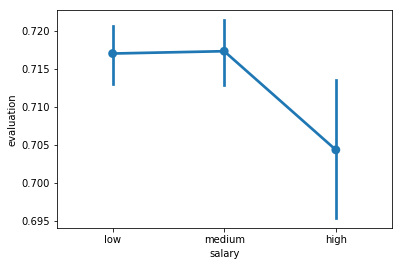

In [47]:
sns.pointplot(x='salary',y='evaluation',data=df)

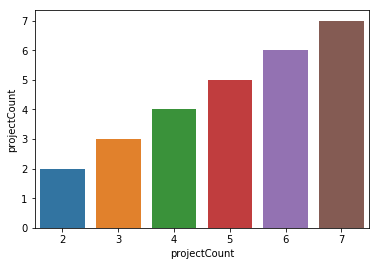

In [48]:
sns.barplot(df.projectCount, df.projectCount)

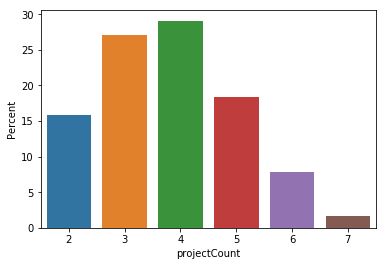

In [53]:
ax=sns.barplot(df.projectCount, df.projectCount, estimator=lambda x: len(x)/len(df)*100)
#ax.set(ylabel='Percent')
ax.set_ylabel('Percent')

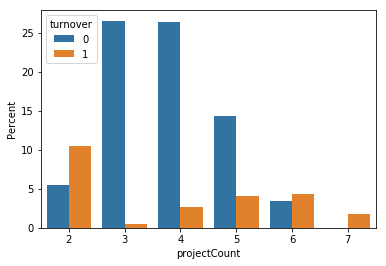

In [54]:
ax=sns.barplot(df.projectCount, df.projectCount, hue=df.turnover, estimator=lambda x: len(x)/len(df)*100)
#ax.set(ylabel='Percent')
ax.set_ylabel('Percent')

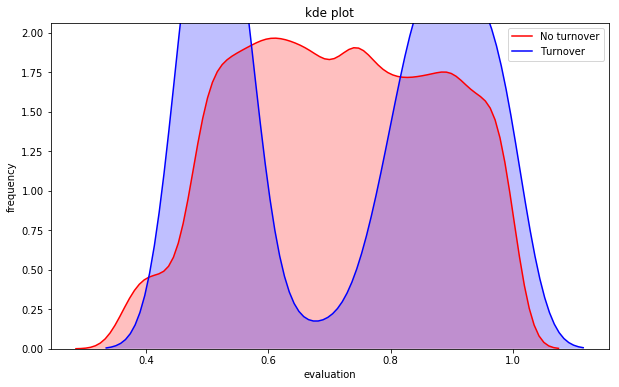

In [57]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df.turnover==0]['evaluation'], color='r',shade=True, label='No turnover')
ax=sns.kdeplot(df[df.turnover==1]['evaluation'],color='b',shade=True, label='Turnover')
ax.set_ylabel('frequency')
ax.set_xlabel('evaluation')
plt.title('kde plot')

In [59]:
np.unique(df.satisfaction[df.turnover==0]==df[df.turnover==0]['satisfaction'])

array([ True], dtype=bool)

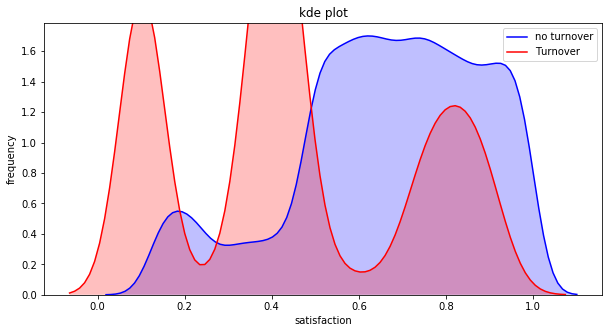

In [61]:
plt.figure(figsize=(10,5))
sns.kdeplot(df[df.turnover==0]['satisfaction'],color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df[df.turnover==1]['satisfaction'],color='r',shade=True, label='Turnover')
ax.set_xlabel('satisfaction')
ax.set_ylabel('frequency')
plt.title('kde plot')

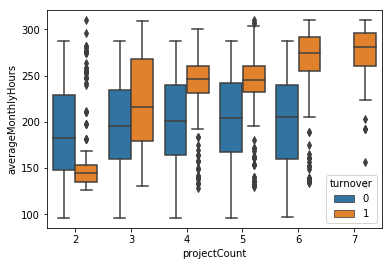

In [62]:
sns.boxplot(df.projectCount, df.averageMonthlyHours, hue=df.turnover)

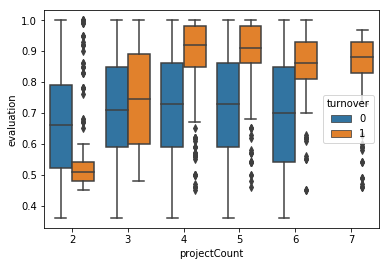

In [64]:
sns.boxplot(x='projectCount',y='evaluation',hue='turnover',data=df)

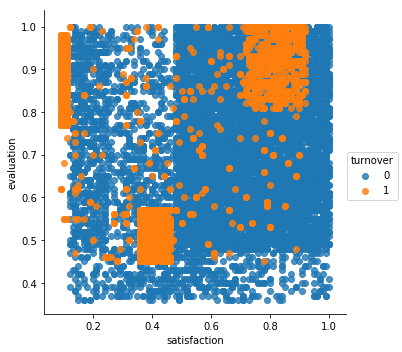

In [65]:
sns.lmplot(x='satisfaction',y='evaluation', data=df, hue='turnover',fit_reg=False)

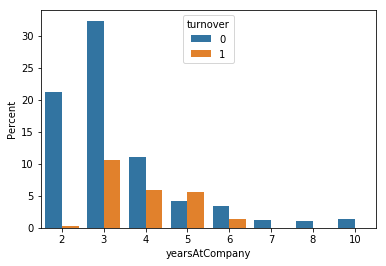

In [71]:
sns.barplot(x='yearsAtCompany',y='yearsAtCompany', hue='turnover',data=df, estimator=lambda x: len(x)/len(df)*100)\
.set_ylabel('Percent')

In [72]:
from sklearn.cluster import KMeans
kmean=KMeans(n_clusters=3, random_state=2)
kmean.fit(df[df.turnover==1][['satisfaction','evaluation']])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [73]:
kmean.labels_

array([1, 0, 2, ..., 1, 2, 1], dtype=int32)

In [74]:
kmean.cluster_centers_

array([[ 0.80851586,  0.91170931],
       [ 0.41014545,  0.51698182],
       [ 0.11115466,  0.86930085]])

In [77]:
k_color=['green' if l==0 else 'blue' if l==2 else 'red' for l in kmean.labels_]
#k_color

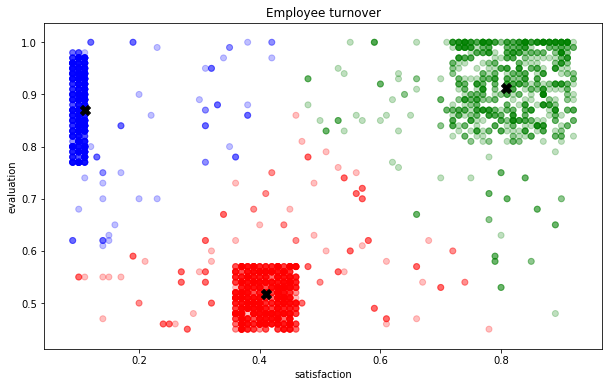

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(x='satisfaction',y='evaluation', data=df[df.turnover==1], color=k_color, alpha=0.25)
plt.xlabel('satisfaction')
plt.ylabel('evaluation')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], color='black', marker='X', s=100)
plt.title('Employee turnover')
plt.show()

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize']=(12,6)

In [84]:
trans=df.department.astype('category').cat.codes
trans.value_counts()

7    4140
9    2720
8    2229
0    1227
6     902
5     858
1     787
2     767
3     739
4     630
dtype: int64

In [86]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
trans2=lb.fit_transform(df.department)
trans2

array([7, 7, 7, ..., 8, 8, 8])

In [88]:
lb.classes_

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

In [90]:
df['department1']=trans2

In [91]:
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary,department1
0,1,0.38,0.53,2,157,3,0,0,sales,low,7
1,1,0.80,0.86,5,262,6,0,0,sales,medium,7
2,1,0.11,0.88,7,272,4,0,0,sales,medium,7
3,1,0.72,0.87,5,223,5,0,0,sales,low,7
4,1,0.37,0.52,2,159,3,0,0,sales,low,7


In [92]:
df['department']=trans2
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary,department1
0,1,0.38,0.53,2,157,3,0,0,7,low,7
1,1,0.80,0.86,5,262,6,0,0,7,medium,7
2,1,0.11,0.88,7,272,4,0,0,7,medium,7
3,1,0.72,0.87,5,223,5,0,0,7,low,7
4,1,0.37,0.52,2,159,3,0,0,7,low,7


In [93]:
df['salary']=lb.fit_transform(df.salary)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary,department1
0,1,0.38,0.53,2,157,3,0,0,7,1,7
1,1,0.80,0.86,5,262,6,0,0,7,2,7
2,1,0.11,0.88,7,272,4,0,0,7,2,7
3,1,0.72,0.87,5,223,5,0,0,7,1,7
4,1,0.37,0.52,2,159,3,0,0,7,1,7


In [94]:
X=df.drop(['department1','turnover'],axis=1)
y=df.turnover

In [97]:
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.15, random_state=123,stratify=y)

In [100]:
tree=DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf=0.01)
tree.fit(x_train, y_train)
importance=tree.feature_importances_

In [101]:
importance

array([  5.09312879e-01,   8.34015961e-02,   1.33111573e-02,
         3.41916368e-02,   3.56607085e-01,   0.00000000e+00,
         0.00000000e+00,   3.11391180e-03,   6.17342988e-05])

In [104]:
feat_name=X.columns
feat_name

Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany', 'workAccident', 'promotion', 'department', 'salary'],
      dtype='object')

In [108]:
ls=np.array([3,6,2,4,1,7,5])
ls[:-1]

array([3, 6, 2, 4, 1, 7])

In [111]:
ls[-3:]

array([1, 7, 5])

In [112]:
ls[::-1]

array([5, 7, 1, 4, 2, 6, 3])

In [113]:
ls[::-2]

array([5, 1, 2, 3])

In [114]:
indices=np.argsort(importance)[::-1]
indices

array([0, 4, 1, 3, 2, 7, 8, 6, 5])

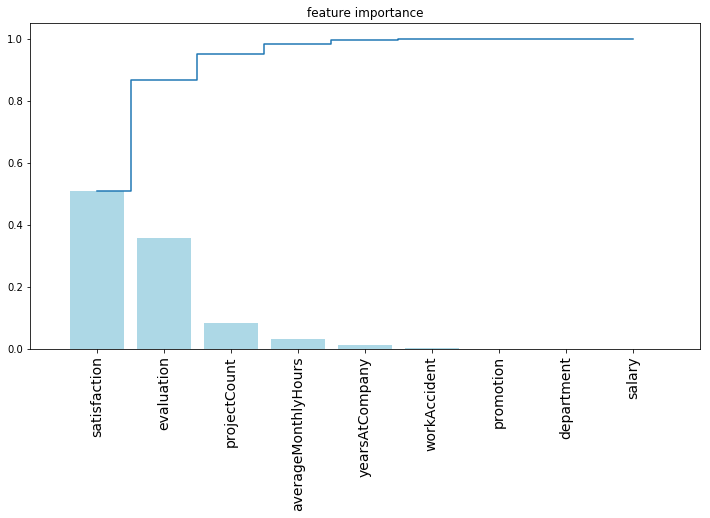

In [126]:
plt.figure(figsize=(12,6))
plt.title("feature importance")
plt.bar(range(len(indices)), importance[indices],color='lightblue')
plt.step(range(len(indices)), np.cumsum(importance[indices]), where='mid')
plt.xticks(range(len(indices)), feat_name, rotation=90, fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()